# **Image denoising with robust PCA**

The aim of this notebook is to make use of the RPCA method to denoise an (artificially corrupted) image. 

Import the needed librairies and classes

In [5]:
%reload_ext autoreload
%autoreload 2

from utils import utils_images
from classes.rpca import RPCA
from classes.graph_rpca import GraphRPCA, GraphRPCAHyperparams

import numpy as np
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.grid"] = False
import PIL.Image

We import an image that we convert to a numpy array

In [8]:
# if needed, download your favorite image
url = "https://www.acaciasfilms.com/wp-content/uploads/2017/11/AF_Myste%CC%80reClouzot-1-800x1132.jpg"
urllib.request.urlretrieve(url, "../data/clouzot.jpg")
img = np.asarray(PIL.Image.open('../data/clouzot.jpg'), dtype=np.uint8)

We first choose the ratio of corrupted pixels `ratio` we want to artificially corrupt the image `img`. In practice, 
`ratio`% of pixels of each slice of the image are corrupted.  Then, we apply a RPCA algorithm that spits the low-rank parts, which are concatenate to form an image. 

**NOTE**: this procedure is quite slow...

In [9]:
%%time

ratio  = 0.25
noisy_image = utils_images.corrupt_image(img, ratio)

res = []
for i in range(noisy_image.shape[2]):
    _, X, _ = RPCA(D=noisy_image[:,:,i]).compute_rpca()
    res.append(X)
restored_image = np.stack(res, axis=-1).astype(np.uint8)

print(f"similarity score between the original and the noisy image: {utils_images.similarity_images(img, noisy_image)}")
print(f"similarity score between the original and the restored image: {utils_images.similarity_images(img, restored_image)}")

similarity score between the original and the noisy image: 0.7369609061239467
similarity score between the original and the restored image: 0.973397754266048
CPU times: user 23min 10s, sys: 4min 32s, total: 27min 42s
Wall time: 4min 26s


Finally, one visually checks the scores obtained.

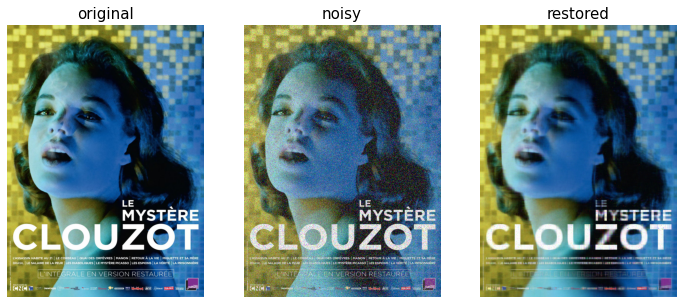

In [10]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(4*3,5))
suptitles = ["original", "noisy", "restored"]
for j, (i,t) in enumerate(zip([img, noisy_image, restored_image], suptitles)):
    ax[j].imshow(i, aspect='auto')
    ax[j].set_title(t, fontsize=15)
    ax[j].axis("off")
plt.show()

**There are of course some limitations with this method.** For instance, one observes the letters are poorly recovered... 
However, without any training, it is possible to denoise, *to some extent*, a corrupted image.  

In [ ]:
%%time

ratio  = 0.25
noisy_image = utils_images.corrupt_image(img, ratio)

res = []
for i in range(noisy_image.shape[2]):
    _, X, _ = GraphRPCA(D=noisy_image[:,:,i], gamma1=20, gamma2=20).compute_graph_rpca()
    res.append(X)
restored_image = np.stack(res, axis=-1).astype(np.uint8)

print(f"similarity score between the original and the noisy image: {utils_images.similarity_images(img, noisy_image)}")
print(f"similarity score between the original and the restored image: {utils_images.similarity_images(img, restored_image)}")